<h1 style="background-color: blue; border-radius: 25px; text-align: center; padding: 1rem;"> Amazing Insights on the Ames Housing dataset </h1>

<h2 style="color:blue; background-color: gray; padding: 1rem;"> Introduction </h2>

<p>
The Ames Housing dataset is a widely acclaimed and extensively used dataset in the field of data science and machine learning, particularly for regression tasks. This dataset includes detailed records of residential properties in Ames, Iowa, making it a rich source of information for real estate analysis and predictive modeling.
</p>
<p>
The primary objective of this project is to leverage the Ames Housing dataset to develop predictive models that can accurately estimate the sale prices of residential properties. By exploring, analyzing, and modeling this dataset, we aim to derive valuable insights that can help stakeholders, such as home buyers, sellers, and real estate professionals, make informed decisions.
</p>

<h3> Dataset overview </h3>

The dataset comprises 81 attributes that encapsulate various aspects of residential properties, including physical characteristics, geographical location, and essential amenities. These features are:

- **Physical Characteristics**: Attributes like `Overall Qual`, `Year Built`, `Gr Liv Area` (ground living area), and `Total Bsmt SF` (total basement area) that describe the structural qualities and dimensions of the properties.
- **Geographical Information**: Attributes such as `Neighborhood`, `MS Zoning`, and `Lot Config`, which provide insights into the location and zoning details of the properties.
- **Amenities and External Features**: Features like `Garage Type`, `Fireplaces`, `Pool Area`, and `Wood Deck SF`, which detail the amenities and external expansions of the properties.

This comprehensive dataset not only enables a detailed analysis of property values but also supports the identification of key factors influencing housing prices. The variety and depth of attributes make it an excellent resource for developing robust predictive models and conducting exploratory data analysis.

<h3> Project Objectives and Approach </h3>

The key objectives of this project are:

1. **Data Exploration and Cleaning**:
   - Conduct an initial data examination to understand the structure and content of the dataset.
   - Handle missing values, outliers, and inconsistencies to prepare a clean and reliable dataset for analysis.

2. **Feature Engineering and Selection**:
   - Perform feature engineering to create new meaningful features and enhance the dataset.
   - Identify and select the most impactful features that contribute significantly to predicting `SalePrice`.

3. **Exploratory Data Analysis (EDA)**:
   - Utilize statistical analysis and visualization techniques to uncover patterns, relationships, and insights within the data.
   - Investigate the distribution of `SalePrice` and its correlation with other features.

4. **Predictive Modeling**:
   - Develop and evaluate various regression models to predict the sale prices accurately.
   - Fine-tune model parameters and validate the models using appropriate metrics to ensure robust performance.

5. **Hypothesis Testing**:
   - Formulate and test hypotheses based on data insights, such as the impact of property quality and size on sale prices.
   - Conduct formal significance tests to validate these hypotheses.


<h2 style="color:blue; background-color: gray; padding: 1rem;"> 1. Brief Description of the Dataset </h2>

<h3> Description </h3>
<p> The Ames Housing dataset is a popular dataset used for regression tasks, where the goal is to predict the sale price of homes in Ames, Iowa, given various features that describe the properties. </p>

<h3> Summary of Attributes </h3>
<p> The dataset consists of 81 features including the target variable `SalePrice`. These features include various aspects of residential homes, such as the lot size, year built, type of garage, number of bathrooms, and neighborhood.</p>


In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [41]:
# URL of the dataset
url = 'https://github.com/sergiomirazo/datasets/blob/main/Ames_Housing_Data.tsv?raw=true'

# Download the data
try:
    response = requests.get(url)
    response.raise_for_status()  # Check that the request was successful
    with open('Ames_Housing_Data.tsv', 'wb') as file:
        file.write(response.content)
    print("Dataset downloaded successfully.")
except requests.HTTPError as e:
    print(f"HTTP error occurred: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset downloaded successfully.


In [3]:
# Load the dataset into a DataFrame
try:
    df = pd.read_csv('Ames_Housing_Data.tsv', sep='\t')
    print("Dataset loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully.


In [43]:
# Display the first few rows of the dataset
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [44]:
# Display the number of rows and columns in the dataset
features = df.columns
print(features[:20])
print(f"Number of rows: {df.shape[0]} | Number of columns: {df.shape[1]}")

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond'],
      dtype='object')
Number of rows: 2930 | Number of columns: 82


<h2 style="color:blue; background-color: gray; padding: 1rem;"> 2. Initial plan for Data Exploration </h2>

<h3>Plan:</h3>

<p>
<b>Summary statistics:</b> Summarize numerical and categorical features.
</p>
<p>
<b>Missing values:</b> Identify and quantify missing data.
</p>
<p>
<b>Distributions: </b> Visualize the distributions of various features.
</p>
<p>
<b>Correlation analysis:</b> Find correlations between features and the target variable 'SalesPrice'.
</p>

In [45]:
# Summary Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [46]:
# Check for missing values
print(df['SalePrice'].describe())

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


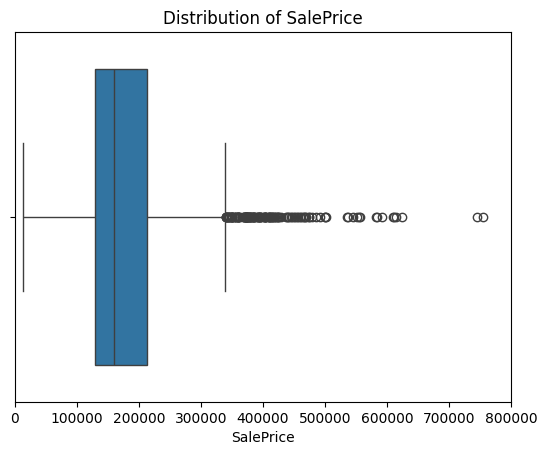

In [5]:
# Visualize the distribution of SalePrice
boxplot = sns.boxplot(x=df['SalePrice'], data=df)
plt.title('Distribution of SalePrice')
plt.xlim(0, 800000)
plt.show()

<p>There are many outliers values above from 300,000 usd price. The dataset is right skewed</p>

In [47]:
# Missing Values
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
dtype: int64


<Axes: xlabel='SalePrice', ylabel='Count'>

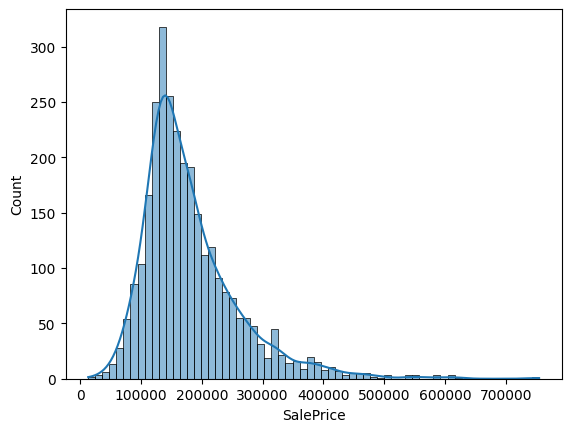

In [48]:
# Visualizing distributions of numerical features
sns.histplot(df['SalePrice'], kde=True)

In [49]:
df['SalePrice'].describe()


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [50]:
print(f"Skewness: {df['SalePrice'].skew()}")

Skewness: 1.7435000757376466


<Axes: >

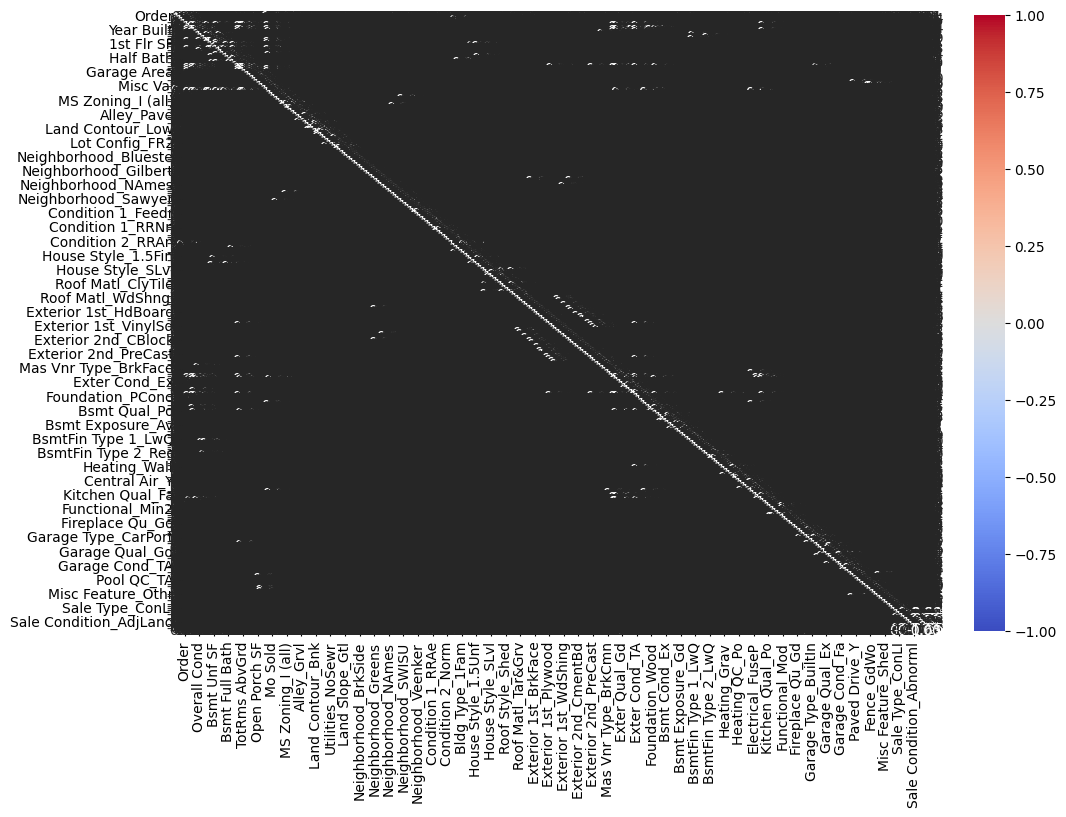

In [51]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

<p>We have a problem here, our matrix is 82 shape and the plot is very blury, we need to do some adjustments in order to get a better plot. First we need to identify the features most correlated with the target variable `SalePrice` and focus on them. Typically, we can filter out features that have a low correlation. </p>

<p> Then we can increase the figure size to make sure each feature is adequately spaced.</p>

<p>
`corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(20).index` identifies the top 20 features that have the highest absolute correlation with `SalePrice`.
</p>

<p>
`corr_matrix.loc[top_features, top_features]` subsets the correlation matrix to include only the top features.
</p>

<p>
The `plt.figure(figsize=(14, 10))` command resizes the plot to ensure clarity, and `sns.heatmap` draws a detailed correlation matrix with annotations.
</p>

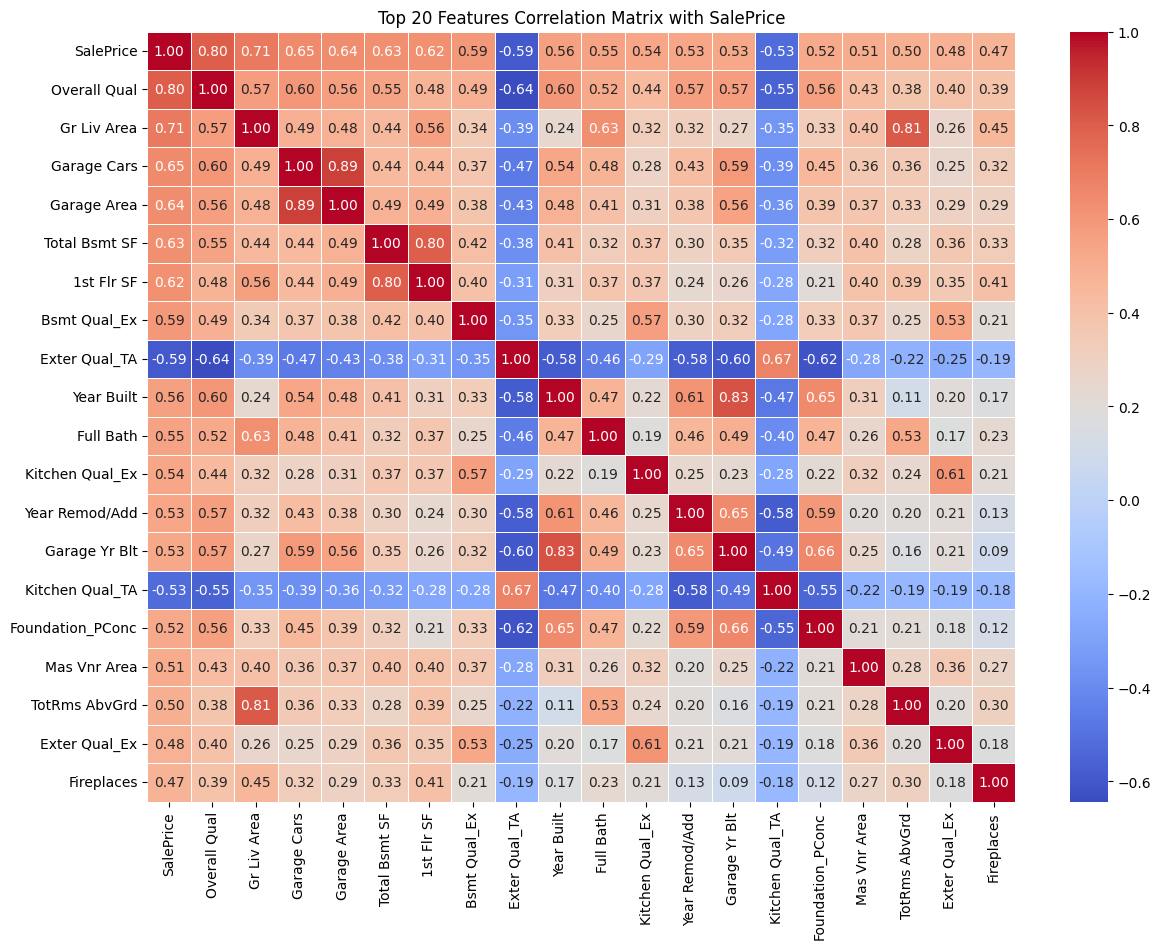

In [56]:
# Encode categorical variables
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Filter the top 20 correlated features with SalePrice
top_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(20).index
filtered_corr_matrix = corr_matrix.loc[top_features, top_features]

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Top 20 Features Correlation Matrix with SalePrice')
plt.show()

<h2 style="color:blue; background-color: gray; padding: 1rem;"> 3. Actions taken for data cleaning and feature </h2>

<p><b>Cleaning and Feature Engineering:</b></p>
<ul>
<li>Handle Missing Values: Impute or drop missing values</li>
<li>Encoding Categorical Variables: Convert categorical variables to numerical values using techniques like one-hot encoding.</li>
</ul>
<p><b>Feature Scaling:</b> Standardize or normalize numerical features.</p>
<p><b>Feature Creation:</b> Create new features based on existing data if necessary.</p>

<h3>Inpect the data </h3>
<p>First, let's inspect the `high_quality` and `low_quality` arrays to ensure they contain valid data.</p>

In [57]:
# Inspect the high quality homes data
high_quality = df[df['Overall Qual'] >= 8]['SalePrice']
print("High Quality Homes:", high_quality.describe())
print("\nHigh Quality Data:\n", high_quality)

# Inspect the low quality homes data
low_quality = df[df['Overall Qual'] < 8]['SalePrice']
print("Low Quality Homes:", low_quality.describe())
print("\nLow Quality Data:\n", low_quality)

High Quality Homes: count       488.000000
mean     303665.018443
std       91428.844077
min      122000.000000
25%      245000.000000
50%      286000.000000
75%      348316.250000
max      755000.000000
Name: SalePrice, dtype: float64

High Quality Data:
 6       213500
7       191500
8       236500
14      212000
15      538000
         ...  
2894    228000
2899    312500
2900    320000
2901    369900
2902    359900
Name: SalePrice, Length: 488, dtype: int64
Low Quality Homes: count      2442.000000
mean     156242.394349
std       48669.820444
min       12789.000000
25%      125000.000000
50%      148800.000000
75%      184975.000000
max      415000.000000
Name: SalePrice, dtype: float64

Low Quality Data:
 0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2442, dtype: int64


<h3> Handle Missing SalePrice Values </h3>
<p>
Ensuring that `SalePrice` does not contain any missing values.
</p>

In [60]:
# Check for missing values in SalePrice
missing_saleprice = df['SalePrice'].isnull().sum()
print("Missing SalePrice values:", missing_saleprice)

Missing SalePrice values: 0


In [59]:
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
print(f"Number of missing values after imputation: {df.isnull().sum().sum()}")

Number of missing values after imputation: 15067


In [ ]:
# Encoding categorical features
df = pd.get_dummies(df, drop_first=True)
print(f"Number of columns after one-hot encoding: {df.shape[1]}")

Number of columns after one-hot encoding: 263


In [ ]:
# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=[np.number])
df[numerical_features.columns] = scaler.fit_transform(numerical_features)
print("Features scaled successfully.")

Features scaled successfully.


<h2 style="color:blue; background-color: gray; padding: 1rem;"> 4. Key findings and insights from EDA </h2>

<p><b>Findings</b>  </p>
<ul>
<li>Overall Quality and Gr Liv Area are highly correlated with `SalePrice`.</li>
<li>Missing values are present in columns like `Alley`, `Fireplace Qu`, `Pool QC`.</li>
<li>Certain neighborhoods have significantly higher property values.</li>
</ul>

In [ ]:
# Example: Correlation with SalePrice
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)
print(top_corr_features)

SalePrice        1.000000
Overall Qual     0.799262
Gr Liv Area      0.706780
Garage Cars      0.647877
Garage Area      0.640401
Total Bsmt SF    0.632280
1st Flr SF       0.621676
Bsmt Qual_Ex     0.593567
Year Built       0.558426
Full Bath        0.545604
Name: SalePrice, dtype: float64


<h2 style="color:blue; background-color: gray; padding: 1rem;"> 5. Formulating hypotheses </h2>

<ul>
<li><b>Hypothesis 1:</b> Homes with higher `Overall Qual` have higher sale prices.</li>
<li><b>Hypothesis 2:</b> Larger homes (`Gr Liv Area`) fetch higher sale prices.</li>
<li><b>Hypothesis 3:</b> Homes in certain neighborhoods have higher average sale prices than others.</li>
</ul>

In [63]:
from scipy.stats import ttest_ind

# Ensure no missing SalePrice values
df = df.dropna(subset=['SalePrice'])

# Re-calculate high and low quality arrays
high_quality = df[df['Overall Qual'] >= 8]['SalePrice']
low_quality = df[df['Overall Qual'] < 8]['SalePrice']

# Perform the t-test again
t_stat, p_val = ttest_ind(high_quality, low_quality, equal_var=False)  # Assuming unequal variances

print(f"T-statistic: {t_stat}, P-value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis: Higher quality homes have a significantly higher sale price.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sale price based on quality.")

T-statistic: 34.65212478964691, P-value: 1.0243108264557457e-139
Reject the null hypothesis: Higher quality homes have a significantly higher sale price.


<h2 style="color:blue; background-color: gray; padding: 1rem;"> 7. Suggestions for the next steps </h2>

<ul>
<li> <b>Modeling phase</b> rain regression models using the cleaned and engineered dataset to predict `SalePrice`. </li>
<li> <b>Hyperparameter Tuning: </b> Optimize models to improve performance.</li>
<li> <b>Feature Importance:</b> Identify the most influential features in predicting `SalePrice`.</li>
</ul>

<h2 style="color:blue; background-color: gray; padding: 1rem;">Conclusions </h2>

<p>
The Ames Housing dataset is a rich dataset with a variety of features that can be used to predict house prices. After performing initial data exploration, missing values were addressed, and key features that have a significant impact on the target variable were identified. The dataset quality appears robust, though it could benefit from additional features such as economic indicators or more recent data to improve predictive performance. Further steps include model development and validation, and potentially collecting more data, such as regional economic conditions, to further refine the analyses.
</p>

<hr>
<h3> Author: Sergio Mirazo </h3>
<p> IBM Machine Learning certification</p>
<p> Personal website: <a href="https://sergiomirazo.dev">sergiomirazo.dev</a></p>
<div style="width: 200px; height: 200px; background-color: blue; border-radius: 25px;">
<img width="200" src="https://sergiomirazo.dev/assets/img/logos/MIRAZO_LABS.png"  />
</div>